# Why fit so bad?
Here in this notebook we explore why the timeseries data fits so bad. Meaning why is the hypothesis test with the real matrix bad? 

In [1]:
### Auto reloading moduls
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from helpFunctions import *
from generateGLV import *
from fitGLV import *
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


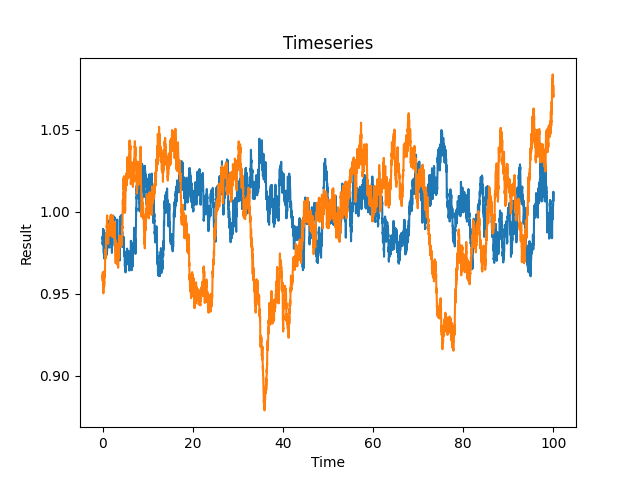

In [4]:
noiseSetting = {
    "noiseType" : "LangevinLinear",
    "noiseStrength" : 0.02
}
pertuSetting = {
    "period" : 1000,
    "strenght" : 0.05
}
genSetting = {
    "interactionStrenght" : 1}

numberSpecies = 2
numberExperiments = 10

# Generate

TS = TS_GLV(numberSpecies,numberExperiments,noiseSetting,genSetting,pertuSetting)
TS.generate()
TS.plot(2)# Plot the zeroth experiment.

<IPython.core.display.Javascript object>


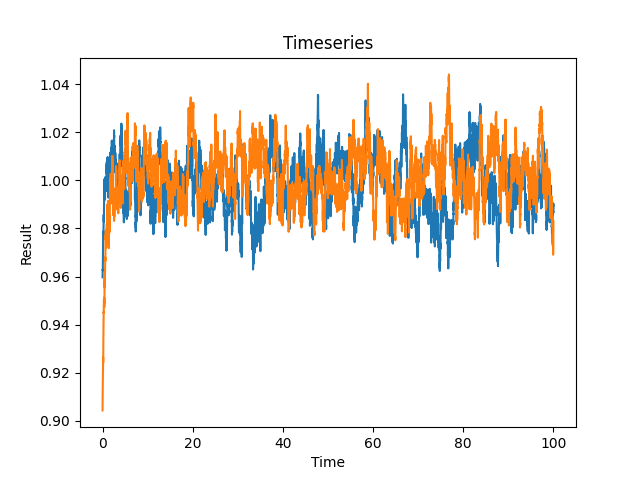

In [102]:
TS.plot(0)

In [6]:
fitObj = fitGLV(TS)

<IPython.core.display.Javascript object>


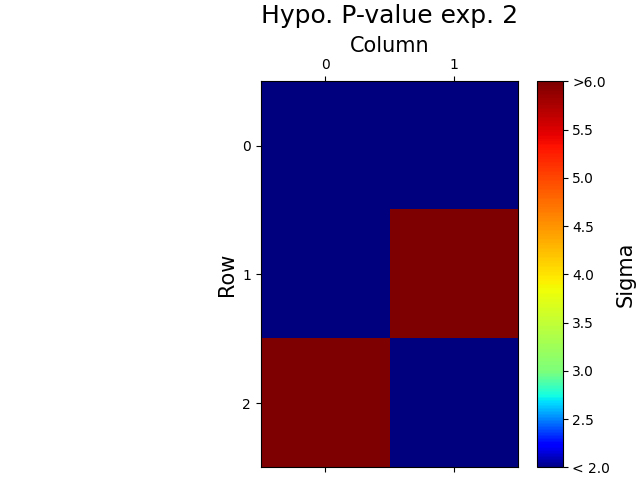

[[[ 2.397978    2.00295129]
  [-1.50380289 -0.89417511]
  [-0.21694675 -1.78600454]]

 [[ 0.37348294  2.20619844]
  [-1.34875104  0.9752681 ]
  [-0.64725313 -1.55894531]]

 [[ 1.47373932  0.27391662]
  [-0.66420572 -0.80953361]
  [ 0.04799618 -0.3219128 ]]

 [[ 2.85092341  1.46499575]
  [-1.77296647 -1.07795694]
  [ 0.02089671 -1.48589246]]

 [[ 1.19060043  0.74255381]
  [-0.9748747  -0.21572573]
  [ 0.06790056 -0.81045436]]

 [[ 1.09979015  0.80366394]
  [-0.93326269 -0.16652747]
  [-0.23463048 -0.56903345]]

 [[ 1.09162164  0.68318015]
  [-0.29673151 -0.79489013]
  [ 1.16209142 -1.84527157]]

 [[ 1.42325683  0.20210199]
  [-1.04810078 -0.37515605]
  [ 0.82205032 -1.02415231]]

 [[ 1.43940169  2.42514322]
  [-0.44615885 -0.99324283]
  [-0.56430459 -1.86083863]]

 [[ 2.27655091 -0.81434039]
  [-1.80130566 -0.47524525]
  [ 0.951376   -0.13703561]]]


/home/lennart/Dropbox/VUB/2Ma Physics and Astronomy/MasterThesis/GitCode/PostFWO/helpFunctions.py:26: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  dnorm = matplotlib.colors.DivergingNorm(vmin=vmin,vcenter=vcenter,vmax=vmax)


In [103]:
fitObj = fitGLV(TS)
out = fitObj.hypo(fitObj.trueMat,plotNumb=2)
print(fitObj.trueMat)

---------------------
Define the a functiont that can plot the 3D data.

<IPython.core.display.Javascript object>


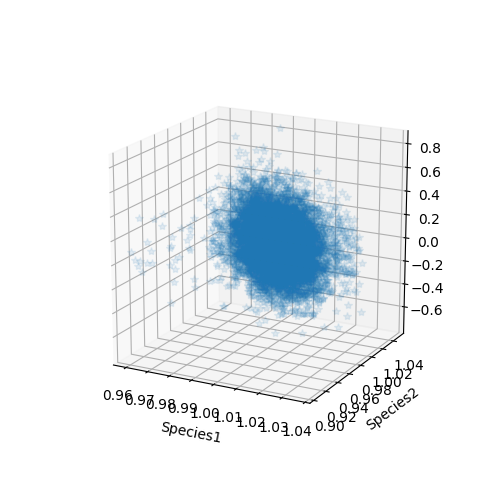

In [7]:
def plot3DY(Y,X,Exp = 0,Ynumber = 0):
    fig = plt.figure(figsize = (5,5))
    ax = fig.add_subplot(111,projection='3d')
    
    YData = Y[Exp,:,Ynumber]
    testXSpecies1 =  X[Exp,:,1]
    testXSpecies2 =  X[Exp,:,2]
    ax.plot(testXSpecies1,testXSpecies2,YData,"*", alpha=0.1)
    plt.xlabel("Species1")
    plt.ylabel("Species2")
    
plot3DY(fitObj.Y,fitObj.X, Exp = 0, Ynumber = 0)

<IPython.core.display.Javascript object>


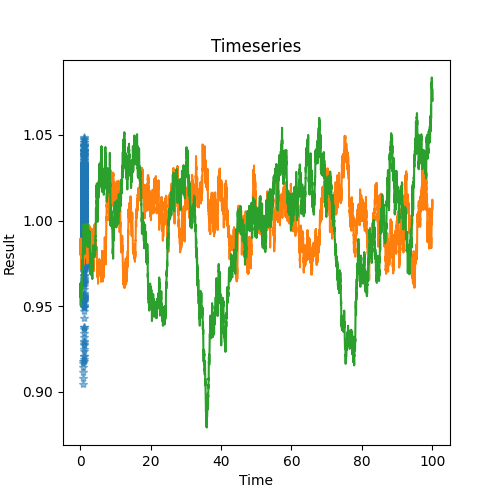

In [13]:
def plot2DScatter(Y,X,xaxis="1",yaxis="2",Exp = 0,Ynumber = 0):
    fig = plt.figure(figsize = (5,5))
    ax = fig.add_subplot(111)
    
    YData = Y[Exp,:,Ynumber]
    testXSpecies1 =  X[Exp,:,1]
    testXSpecies2 =  X[Exp,:,2]
    
    if xaxis == "1":
        X_ = testXSpecies1
    elif xaxis == "2":
        X_ = testXSpecies2
    else:
        pass
    
    if yaxis == "1":
        Y_ = testXSpecies1
    elif yaxis == "2":
        Y_ = testXSpecies2
    else:
        Y_ = YData
        
        
    ax.plot(X_,Y_,"*",alpha=0.5)
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    
plot2DScatter(fitObj.Y,fitObj.X,xaxis="1",yaxis="2",Exp=0,Ynumber=1)

maxWidth = 0.1
AverageSlope =  1
So expected change is slope is 0.1 in Y. But in reality, this is even lower. In more real cases the slope is 0.1 and the max width is 0.08 -> Y change of 0.008. Almost ten orders of magnitude lower. While the range on Y goes from -0.8 to 0.8

### Made observations
1. There is central "blob" structure. ( aka the shape where the data points are most centered). This ofcourse is determined by the model. Since if model contribution was zero. -> It would just start a random walk. However the model forces it to go back to (1,1).
2. The range over which species 1 and 2 spand is roughly [0.95,1.05]. This is roughly the range of the blob. 
3. The range over which the log of the relative velocity spands, roughly a sigma of 0.3.. Meaning Y roughly ranges from [-1,1]. 
4. As calculated in the small text above this list. The change of the plane duo, the model is very small in this range. Ranging from jut a change of slope of max 0.1 and as small as 0.008. 
5. When fitting there is a clear bias towards the dimension to which the Y-output is correlated for the next position (aka the self interaction). This is really strange since all dimension contribute when it comes to determining the Y. AND the fitting should not be depeneded on the relation between points! Still there is a clear bias shown even though self interaction and interaction are on the same magnitude (not the same value roughly, there self interaction is lower, but no so much lower that it would explain this bias).

## No interacation

So we concluded in the observations made above there is this "blob". Or equivalent the region where the species 1 2 values like to hang out. Now these are the regions where the model contribution is not that large, and hence the random noise can push against it. However, going to far and the models bias starts to win and it is less likely that it will stay in that region. 

Now, I want to specifacally investigate this random walk region. Since very interestingly in roughly half the experiments above it was seen that this shape follows roughly a elipse form but spanning from upper left to the down right corner. -> Meaning the lower left and upper right are clearly forbidden duo the large model contribution. 

Now, I want to test my hypothesis by looking evaluating models who have *NO* interaction. Hence, the bias duo the model along an axis is only determined by the position on that axis. This sceme then only predicts elipse shapes elanged along the axis. With the strech size inversly proportional to the strength of self interaction. 

<IPython.core.display.Javascript object>


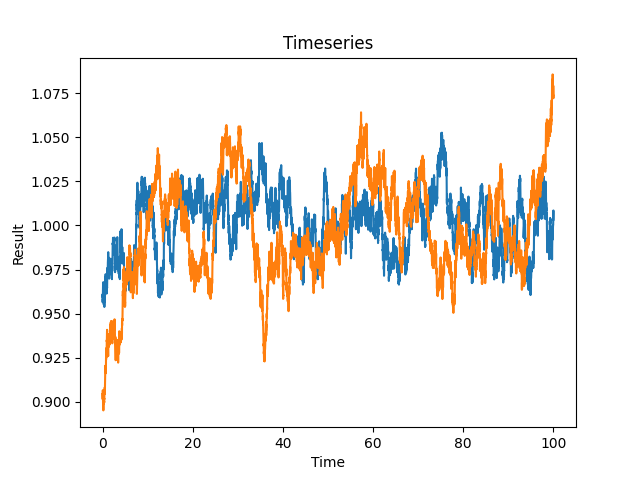

In [28]:
noiseSetting = {
    "noiseType" : "LangevinLinear",
    "noiseStrength" : 0.02
}
pertuSetting = {
    "period" : 1000,
    "strenght" : 0.05
}
genSetting = {
    "interactionStrenght" : 0}

numberSpecies = 2
numberExperiments = 10

# Generate

TSNoInt = TS_GLV(numberSpecies,numberExperiments,noiseSetting,genSetting,pertuSetting)
TSNoInt.generate()
TSNoInt.plot(2)# Plot the zeroth experiment.

In [23]:
fitObjNoInt = fitGLV(TSNoInt)

<IPython.core.display.Javascript object>


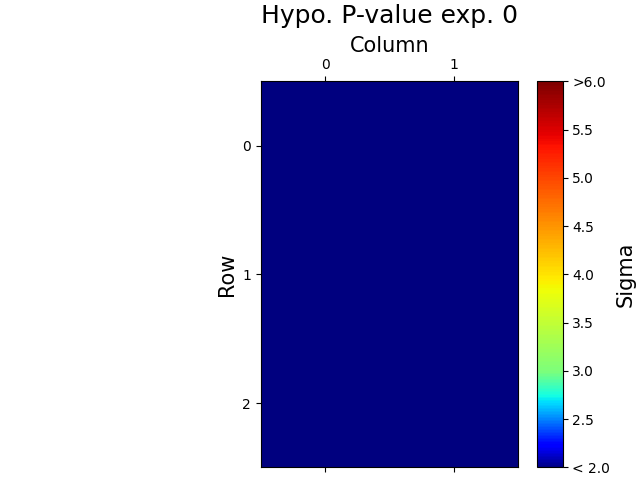

In [64]:
out = fitObjNoInt.hypo(fitObjNoInt.trueMat,plotNumb=0)

<IPython.core.display.Javascript object>


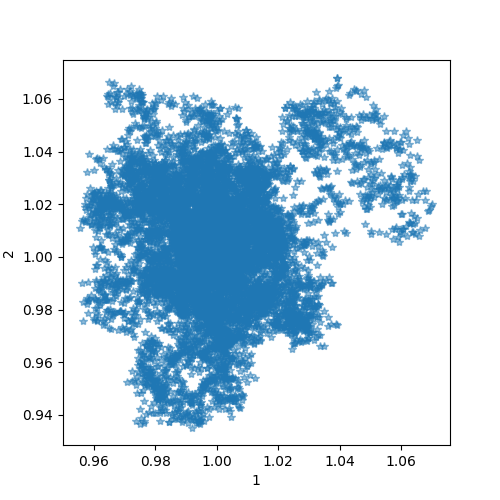

In [36]:
plot2DScatter(fitObjNoInt.Y,fitObjNoInt.X,Exp=9,Ynumber=0)

### Made observations
1. Indeed, What I predicted was seen for the few examples. The "blob" region is now mainly an elipse from along the main axis. -> No main, deviations have been seen from this. 
2. In this case the -> The fitted values p-values are PERFECT.

This is actually really strong, since we now now when the "blob" form is not alligned along an axis-> We already by default can say there is a interaction between the two.

- This is not garantueed. We saw plenty of experiments above WITH interaction which still had circlular shape.
- This does not generated well to large dimensions... Surely if there are not that many points.

## Test it with costum data in simular condition
Let's fit costum data but now with a bit more simular brutal conditions. And see how it now fits.

In [79]:
from GeneralDataGen import *
numspecies = 2
NumExperiments = 10
testObject = Data(numspecies,numspecies, numberOfExperiments =  NumExperiments)
# Noise level
noiseValue = 0.3
testObject.setNoiseStd(np.repeat(noiseValue,testObject.outputDim))
# Parameters:
intercept = np.ones(numspecies).reshape(1,numspecies) # Growth rate
interaction = np.full((numspecies,numspecies),0.5) # Off diagonal interaction
np.fill_diagonal(interaction,-1) # Diagonal 
parameter = np.append(intercept,interaction,axis=0) # Put them toghter
testObject.setModelParameters(parameter)# Give it to the object
testObject.coefMatrix# Print it 

array([[ 1. ,  1. ],
       [-1. ,  0.5],
       [ 0.5, -1. ]])

In [80]:
# Set range of which is the species are sampled
typeSample = "gaussian"
parameters = {"mean":np.array([1,1]),
              "sigma":np.array([0.02,0.02])}
testObject.setSampleX(typeSample,parameters)

In [81]:
testObject.numberOfObservations = 10000 
testObject.generate()

Now do the fitting

In [82]:
fitObjectTestData = fitGLV(testObject,typeInput="Data")

Lets first look at how the data is spread.

<IPython.core.display.Javascript object>


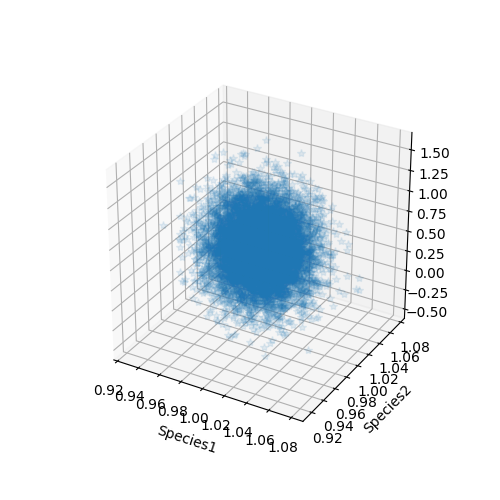

<IPython.core.display.Javascript object>


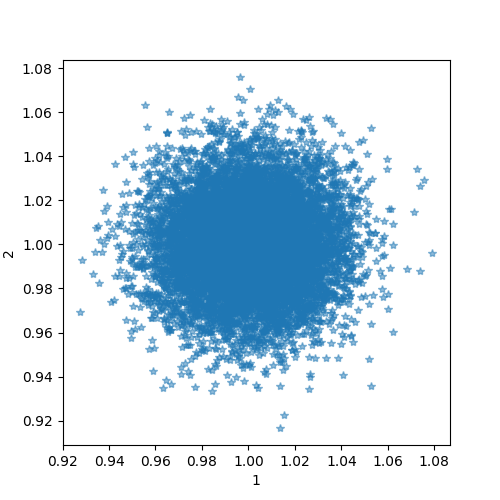

In [83]:
plot3DY(fitObjectTestData.Y,fitObjectTestData.X, Exp = 0, Ynumber = 0)
plot2DScatter(fitObjectTestData.Y, fitObjectTestData.X, Exp=0,Ynumber=0)

Ok the data is not quite the same. For instance the (1,1) is not stable with this data (probably), But it is good enough to run with. Let's scheck out the fitting.

<IPython.core.display.Javascript object>


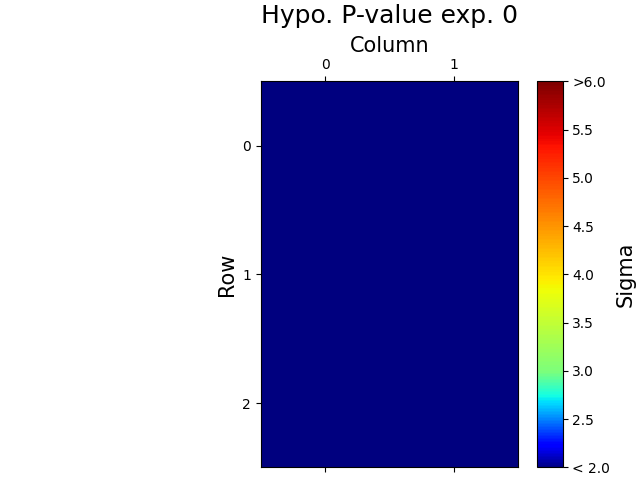

/home/lennart/Dropbox/VUB/2Ma Physics and Astronomy/MasterThesis/GitCode/PostFWO/helpFunctions.py:26: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  dnorm = matplotlib.colors.DivergingNorm(vmin=vmin,vcenter=vcenter,vmax=vmax)


In [84]:
out = fitObjectTestData.hypo(fitObjectTestData.trueMat,plotNumb=0)

<IPython.core.display.Javascript object>


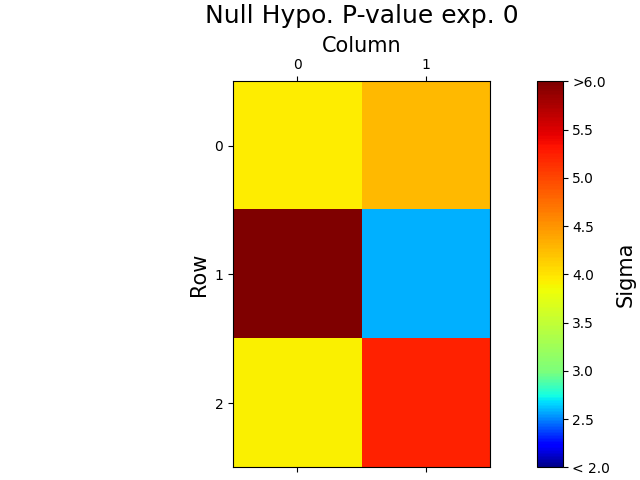

/home/lennart/Dropbox/VUB/2Ma Physics and Astronomy/MasterThesis/GitCode/PostFWO/helpFunctions.py:26: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  dnorm = matplotlib.colors.DivergingNorm(vmin=vmin,vcenter=vcenter,vmax=vmax)


In [86]:
fitObjectTestData.plotNullHypo(0)

In [85]:
fitObjectTestData.BEst

array([[[ 0.83224274,  0.89541106],
        [-0.92338503,  0.38524274],
        [ 0.59129255, -0.78377632]],

       [[ 0.6939343 ,  0.67205517],
        [-0.82303372,  0.64331706],
        [ 0.63209869, -0.81521056]],

       [[ 0.99260941,  0.96542933],
        [-1.12417384,  0.46009134],
        [ 0.63102983, -0.9264099 ]],

       [[ 0.95584733,  0.62305395],
        [-1.056306  ,  0.52669691],
        [ 0.60301667, -0.64641971]],

       [[ 1.04975123,  1.05347259],
        [-1.13651525,  0.43721947],
        [ 0.58811711, -0.99243662]],

       [[ 1.38743829,  0.97039631],
        [-1.16529478,  0.52682398],
        [ 0.27943166, -0.99592469]],

       [[ 1.18290694,  1.12932689],
        [-1.21989165,  0.41268964],
        [ 0.53371081, -1.04042886]],

       [[ 1.08026784,  1.10202696],
        [-1.07733092,  0.33823658],
        [ 0.50105488, -0.93970265]],

       [[ 0.73918635,  0.8854064 ],
        [-0.70068143,  0.79670859],
        [ 0.46480175, -1.18361143]],

       [[ 

## Insert interaction matrix that is stable!
Lets now generate costum data with coef matrix that is picked from a timeseries above. Let's do the one for experiment 0 since we know that there is intrinsic bias there towards the self interaction. 

And the noise level is set equal to =  0.2. Which is the real noise level of the time generated data! -> This can be computed manually. The actuall noise drift is equal to 0.002. But the globular shape of the "blob" is of sigma range 0.02. Clearly showing that it takes multiple steps to walk around in the blob. ("roughly 10-30 step distances") 

In [87]:
numspecies = 2
NumExperiments = 10
testObject2 = Data(numspecies,numspecies, numberOfExperiments =  NumExperiments)
# Noise level
noiseValue = 0.2
testObject2.setNoiseStd(np.repeat(noiseValue,testObject.outputDim))
# Parameters:
parameter = np.array([[ 2.397978,   2.00295129],
                      [-1.50380289,-0.89417511],
                      [-0.21694675,-1.78600454]])
testObject2.setModelParameters(parameter)# Give it to the object
print(testObject2.coefMatrix)

# Set range of which is the species are sampled
typeSample = "gaussian"
parameters = {"mean":np.array([1,1]),
              "sigma":np.array([0.02,0.02])}
testObject2.setSampleX(typeSample,parameters)

testObject2.numberOfObservations = 10000 
testObject2.generate()

Now create the fit object and look again at the 3D 2D plot to see if everything is correct

In [88]:
fitObjectTestData2 = fitGLV(testObject2,typeInput="Data")

<IPython.core.display.Javascript object>


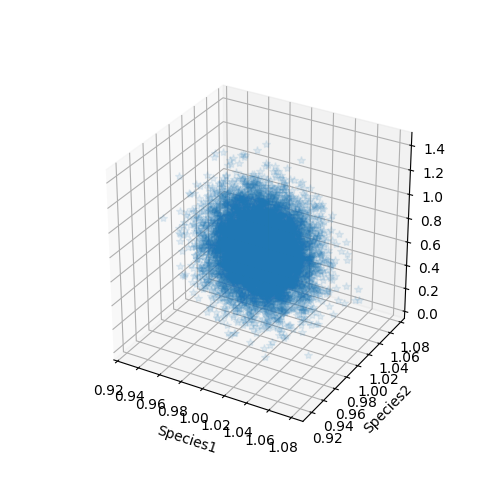

<IPython.core.display.Javascript object>


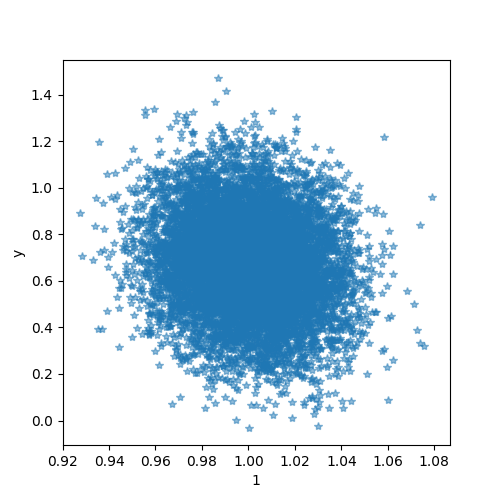

In [101]:
plot3DY(fitObjectTestData2.Y,fitObjectTestData2.X, Exp = 0, Ynumber = 0)
plot2DScatter(fitObjectTestData2.Y, fitObjectTestData2.X,xaxis="1",yaxis="y",Exp=0,Ynumber=0)

Now lets look at the fitted data. See how the null hypo and the real hypo perform:

<IPython.core.display.Javascript object>


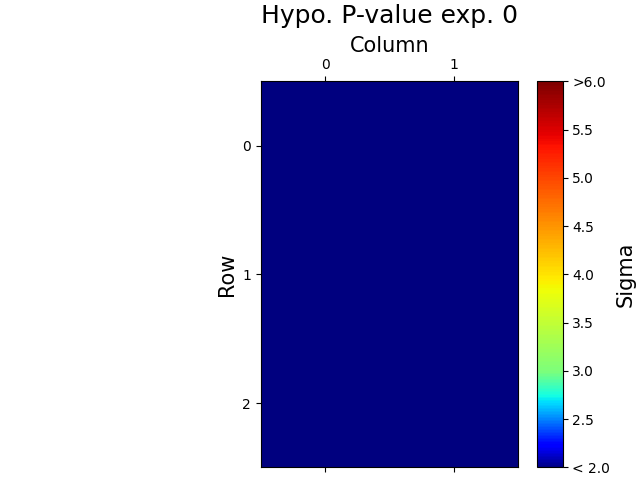

<IPython.core.display.Javascript object>


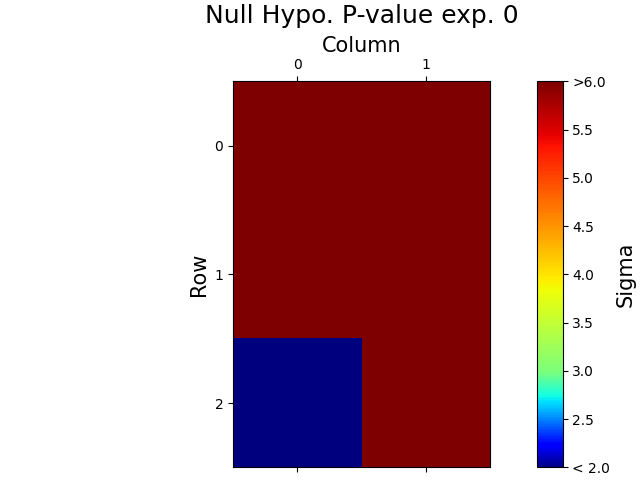

In [94]:
out = fitObjectTestData2.hypo(fitObjectTestData2.trueMat,plotNumb=0)
fitObjectTestData2.plotNullHypo(0)

In [95]:
fitObjectTestData2.BEst

array([[[ 2.28613982,  1.93322533],
        [-1.45272624, -0.97067995],
        [-0.15608505, -1.64185542]],

       [[ 2.1939342 ,  1.78432141],
        [-1.38582537, -0.79863041],
        [-0.12888096, -1.66281158]],

       [[ 2.39305094,  1.97990418],
        [-1.58658545, -0.92078088],
        [-0.12959353, -1.73694447]],

       [[ 2.36854289,  1.75165393],
        [-1.54134022, -0.87637717],
        [-0.14826897, -1.55028434]],

       [[ 2.43114549,  2.03859968],
        [-1.59481306, -0.9360288 ],
        [-0.15820201, -1.78096228]],

       [[ 2.65627019,  1.98321549],
        [-1.61399941, -0.87629246],
        [-0.36399231, -1.78328767]],

       [[ 2.51991596,  2.08916921],
        [-1.65039732, -0.95238202],
        [-0.19447287, -1.81295711]],

       [[ 2.4514899 ,  2.07096926],
        [-1.55535684, -1.00201739],
        [-0.2162435 , -1.7458063 ]],

       [[ 2.22410223,  1.92655556],
        [-1.30425718, -0.69636939],
        [-0.24041225, -1.90841216]],

       [[ 

### Made observations:
1. Even though we have now created simular conditions as the timeseries data: *same number of points, same region overwich the species go [-0.95,1.05], same level of noise strenght*. Still the fit was succesfull! Though not as good as previously, it could clearly make out that the real hypothesis was correct, and that null should be rejected. Also there was clearly not an inherent bias towards the selfinteraction.
2. Even if we have an coef matrix that was generated from a real time series (exp = 0,int = 1). And have the correct noise level = 0.2 (mainly computed and fitted by the way). And the same region (roughly) where species 1 and 2 are -> And it still correctly fits the interaction matrix!
3. Another made observations is that at the steady state the Y-> Value for the manually calculated data is at Y = (0.7,-0.7). Which also computed mainly calculating it via the plane. So what went wrong? Because the growth rate should be such that at steady state it is zero. 

**IMPORTANT**:
As said in point 3 of the list above. There is a big difference between the data is directly simulated from the plane that we want to fit and that of the timeseries that supposidly should also fit this data!

Meaning the data of the timeseries follows a **different** PLANE -> hence there is **NO WAY** we could fit it correct since the data computed inherently follows another plane! -> Hence the fit with itself is bad!

So the mistake maybe does not lie in the fact of the timeseries data but in the computation of Y! Lets uncover what went wrong and this is something analytical!

--------
# Updated the code. 
Updated the code. I made two mistakes that ended up cancel each other. However, I still then fitted the data wrong-> Has been fixed. Lets now look at fittings!

In [14]:
noiseSetting = {
    "noiseType" : "LangevinLinear",
    "noiseStrength" : 0.02
}
pertuSetting = {
    "period" : 1000,
    "strenght" : 0.05
}
genSetting = {
    "interactionStrenght" : 1}

numberSpecies = 2
numberExperiments = 10

# Generate

TS = TS_GLV(numberSpecies,numberExperiments,noiseSetting,genSetting,pertuSetting)
TS.generate()
TS.plot(2)# Plot the zeroth experiment.

<IPython.core.display.Javascript object>


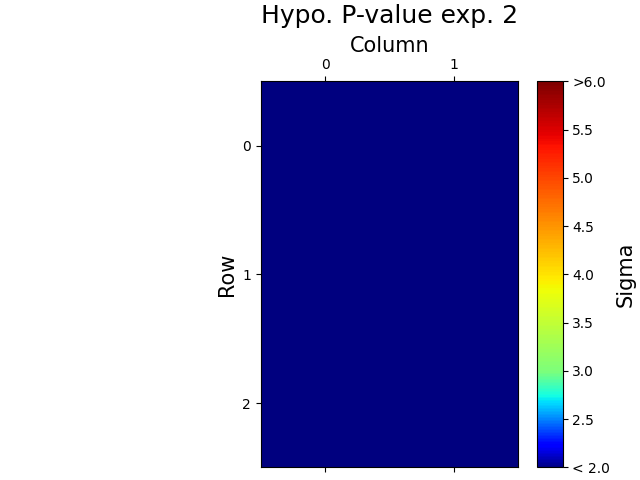

In [18]:
fitObj = fitGLV(TS)
out = fitObj.hypo(fitObj.trueMat,plotNumb=2)

-----
Compare the real matrix with now the fitted matrix:

<IPython.core.display.Javascript object>


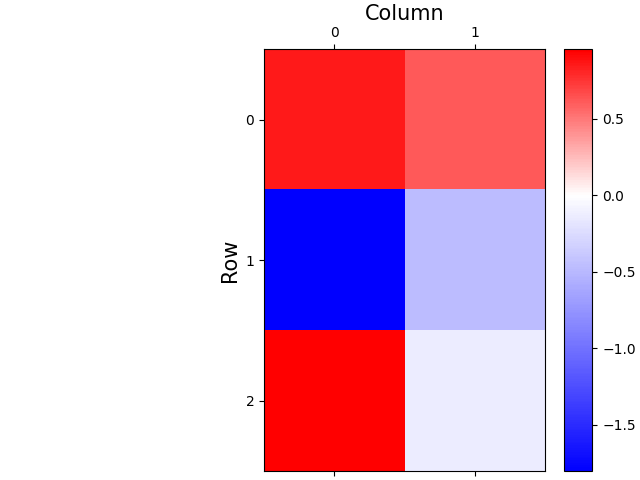

<IPython.core.display.Javascript object>


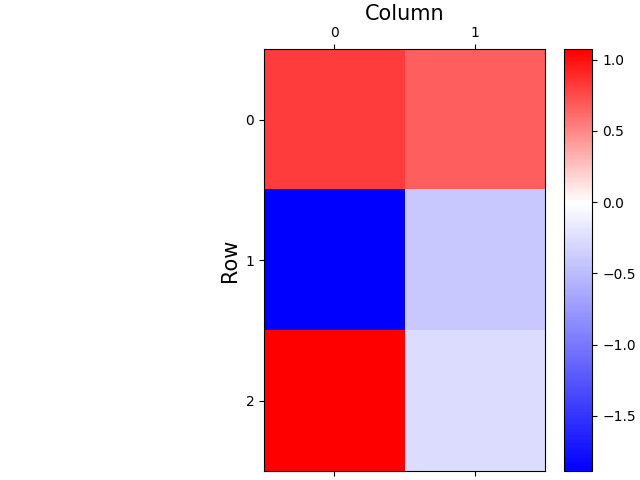

In [25]:
exp = 9
plotM(fitObj.trueMat[exp],"",mode="PosNeg")
plotM(fitObj.BEst[exp],"",mode="PosNeg")

! WOOOHOOOO. IT has been fixed! 

<IPython.core.display.Javascript object>


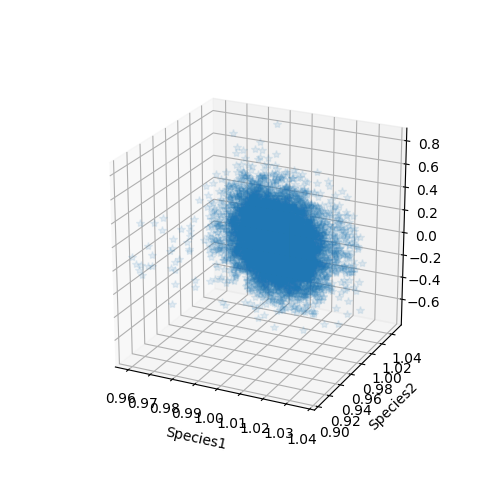

<IPython.core.display.Javascript object>


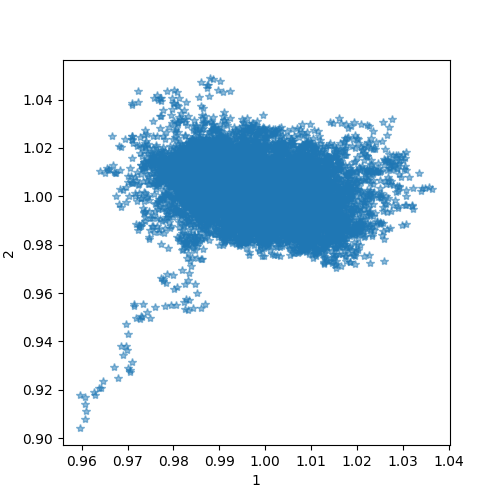

In [30]:
plot3DY(fitObj.Y,fitObj.X, Exp = 0, Ynumber = 0)
plot2DScatter(fitObj.Y, fitObj.X,Exp=0,Ynumber=0)

## Check performance on 5 Species data.  

In [23]:
noiseSetting = {
    "noiseType" : "LangevinLinear",
    "noiseStrength" : 0.02
}
pertuSetting = {
    "period" : 1000,
    "strenght" : 0.05
}
genSetting = {
    "interactionStrenght" : 1}

numberSpecies = 5
numberExperiments = 10

# Generate

TS = TS_GLV(numberSpecies,numberExperiments,noiseSetting,genSetting,pertuSetting)
TS.generate()
TS.plot(0)# Plot the zeroth experiment.

<IPython.core.display.Javascript object>


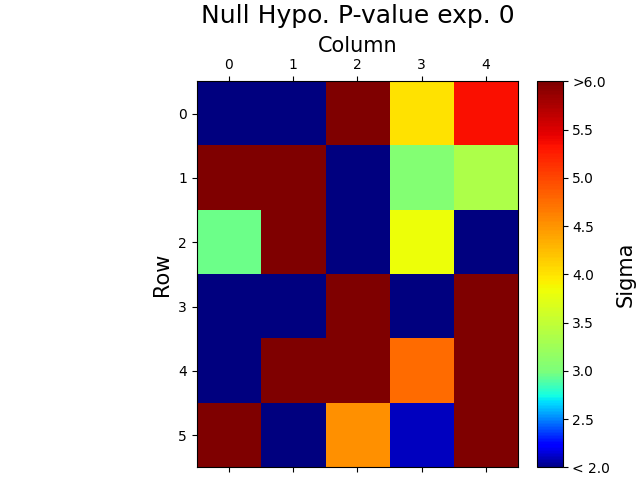

In [25]:
fitObj = fitGLV(TS)
#out = fitObj.hypo(fitObj.trueMat,plotNumb=0)
fitObj.plotNullHypo()

<IPython.core.display.Javascript object>


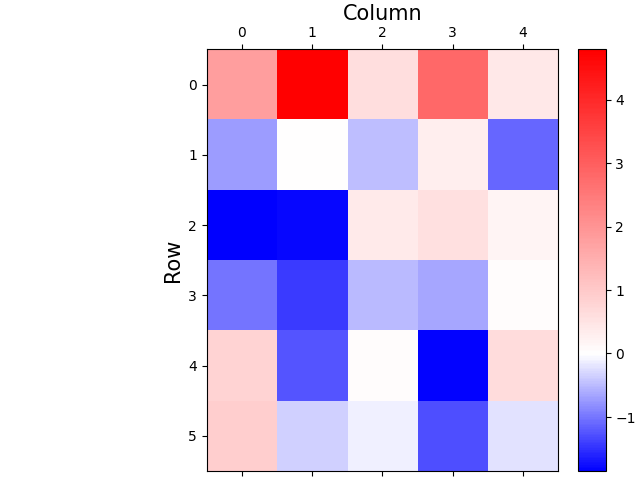

<IPython.core.display.Javascript object>


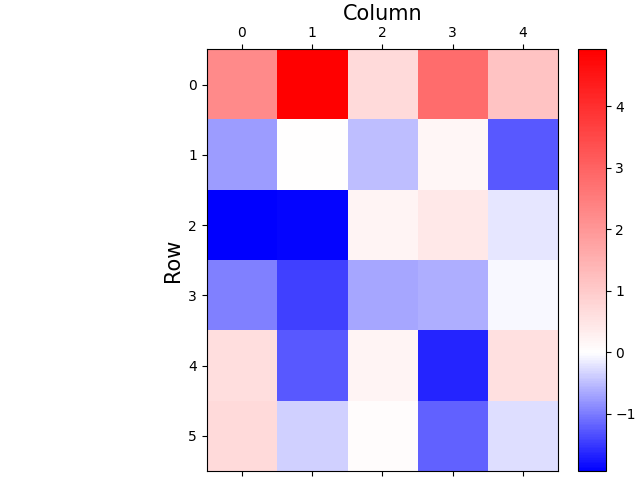

In [45]:
exp = 2
plotM(fitObj.trueMat[exp],"",mode="PosNeg")
plotM(fitObj.BEst[exp],"",mode="PosNeg")

It even works great with multiple species! Now I am really happy and so now it is onwards to push towards. Good fitting!